1
2
3
All done


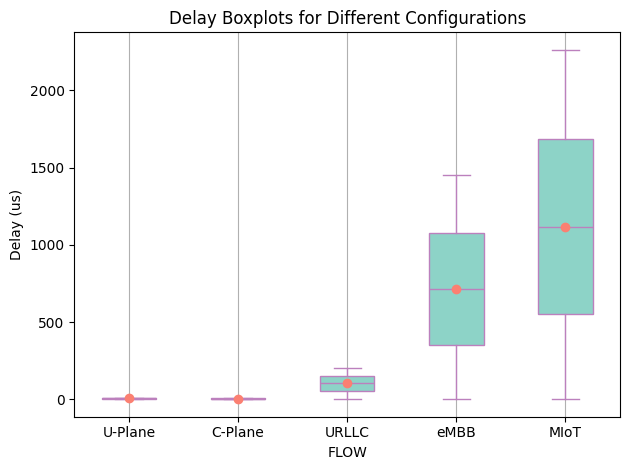

Mean Delay for U-Plane: 4.900454558910599 us
Mean Delay for C-Plane: 4.709967213114755 us
Mean Delay for URLLC: 102.23926447194779 us
Mean Delay for eMBB: 714.6487250898878 us
Mean Delay for MIoT: 1118.6083530002009 us
28037
89000
4983


In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

# Set a custom color palette
colors = plt.cm.Set3.colors

folder = "./sim_results/Flow20M_42.0/"
plt.rcParams["figure.autolayout"] = True

Flow_min_value = 1
Flow_max_value = 4
RU = 3
Step = 1
configs_txt = ["U-Plane", "C-Plane", "URLLC", "eMBB", "MIoT"]
Flows = np.arange(1, Flow_max_value + Step, Step)
Ru = np.arange(1, RU + Step, Step)
AAUs = np.arange(1, 13, 1)
Nsim = 1
delay = []
delay_aux = [] 
fmt=["bo", "go", "yo"]
delay_us = []
delay_control = []
delay_user = []
delay_rt = []
for flow in Flows:
    # Read data into pandas DataFrames
    if flow == 1:
        for ru in Ru:
            print(ru)
            CTx = pd.read_csv(f"{folder}TxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            UTx = pd.read_csv(f"{folder}TxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            CRx = pd.read_csv(f"{folder}RxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            URx = pd.read_csv(f"{folder}RxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])

            # Calculate delay for user and control configurations
            min_len = min(len(UTx), len(URx))
            delay_user.append(URx["Time"].values[:min_len] - UTx["Time"].values[:min_len])
            min_len = min(len(CTx), len(CRx))
            delay_control.append(CRx["Time"].values[:min_len] - CTx["Time"].values[:min_len])
            # Assign values to the corresponding columns in the delay DataFrame
            
        delay.append(np.concatenate(delay_user))
        delay.append(np.concatenate(delay_control))
    else: 
        delay_rt = []
        for num in AAUs:
            # print(f"Num AAU flow{num}")
            Tx = pd.read_csv(f"{folder}TxFile{num-1 + 12*(flow-2)}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            Rx = pd.read_csv(f"{folder}RxFile{num-1 + 12*(flow-2)}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            # Ensure that the length of 'Tx' matches the length of 'Rx'
            min_len = min(len(Tx), len(Rx))
            delay_rt.append( Rx["Time"].values[:(min_len-1)] - Tx["Time"].values[:(min_len-1)])

        # Assign values to the corresponding columns in the delay DataFrame
        delay.append(np.concatenate(delay_rt))
    
print("All done")
# Boxplot with enhanced style
delay_us = [arr*1e-3 for arr in delay]    
delay = []
bp = plt.boxplot(
    delay_us,
    labels=configs_txt,
    showmeans=True,
    showfliers=False,
    patch_artist=True,  # fill with color
    boxprops=dict(facecolor=colors[0], color=colors[9]),
    capprops=dict(color=colors[9]),
    whiskerprops=dict(color=colors[9]),
    flierprops=dict(markeredgecolor=colors[9], markerfacecolor=colors[9]),
    medianprops=dict(color=colors[9]),
    meanprops=dict(marker="o", markerfacecolor=colors[3], markeredgecolor=colors[3]),
)

# Customize labels and title
plt.ylabel("Delay (us)")
plt.xlabel("FLOW")
plt.title("Delay Boxplots for Different Configurations")

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid()
plt.show()

# Extracting mean delay values from the boxplot object
mean_delays = [item.get_ydata()[0] for item in bp['means']]

# Printing mean delay for each configuration
for config, mean_delay in zip(configs_txt, mean_delays):
    print(f"Mean Delay for {config}: {mean_delay} us")

print(len(delay_us[2]))
print(len(delay_us[3]))
print(len(delay_us[4]))




In [212]:
# Extracting boxplot information
boxplot_info = {
    "lw": [item.get_ydata()[1] for item in bp['whiskers'][::2]],
    "lq": [item.get_ydata()[0] for item in bp['whiskers'][::2]],
    "med": [item.get_ydata()[1] for item in bp['medians']],
    "uq": [item.get_ydata()[0] for item in bp['whiskers'][1::2]],
    "uw": [item.get_ydata()[1] for item in bp['whiskers'][1::2]],
    "xaux": range(len(configs_txt)),
    "avg": [item.get_ydata()[0] for item in bp['means']]
}

# Write boxplot information to a text file
with open(folder + "boxplot_info.txt", "w") as file:
    file.write("lw\tlq\tmed\tuq\tuw\txaux\tavg\n")
    for i in range(len(configs_txt)):
        line = "\t".join(str(boxplot_info[key][i]) for key in boxplot_info.keys())
        file.write(line + "\n")

if (delay_us[1] == 0).any():
    print(True)

IndexError: list index out of range

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

# Set a custom color palette
colors = plt.cm.Set3.colors

folder = "./sim_results/20M_41832_CUPlane/"
plt.rcParams["figure.autolayout"] = True

Flow_min_value = 1
Flow_max_value = 4
RU = 3
Step = 1
configs_txt = ["U-Plane", "C-Plane", "URLLC", "eMBB", "MIoT"]
Flows = np.arange(1, Flow_max_value + Step, Step)
Ru = np.arange(1, RU + Step, Step)
AAUs = np.arange(1, 13, 1)
Nsim = 1
delay = []
delay_aux = [] 
fmt=["bo", "go", "yo"]
delay_us = []
delay_control = []
delay_user = []
for flow in Flows:
    # Read data into pandas DataFrames
    if flow == 1:
        for ru in Ru:
            print(ru)
            CTx = pd.read_csv(f"{folder}TxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            UTx = pd.read_csv(f"{folder}TxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            CRx = pd.read_csv(f"{folder}RxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            URx = pd.read_csv(f"{folder}RxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])

            # Calculate delay for user and control configurations
            # min_len = min(len(UTx), len(URx))
            delay_user.append(URx["Time"].values - UTx["Time"].values)
            # min_len = min(len(CTx), len(CRx))
            delay_control.append(CRx["Time"].values - CTx["Time"].values)
            # Assign values to the corresponding columns in the delay DataFrame
            
        delay.append(np.concatenate(delay_user))
        delay.append(np.concatenate(delay_control))
    else: 
        delay_rt = []
        for num in AAUs:
        
            # print(f"Num AAU flow{num}")
            Tx = pd.read_csv(f"{folder}TxFile{num-1 + 12*(flow-2)}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            Rx = pd.read_csv(f"{folder}RxFile{num-1 + 12*(flow-2)}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            # Ensure that the length of 'Tx' matches the length of 'Rx'
            # min_len = min(len(Tx), len(Rx))
            delay_rt.append(Rx["Time"].values- Tx["Time"].values)
       
        # Assign values to the corresponding columns in the delay DataFrame
        delay.append(np.concatenate(delay_rt))
    
print("All done")
# Boxplot with enhanced style
delay_us = [arr*1e-3 for arr in delay]    
delay = []
bp = plt.boxplot(
    delay_us,
    labels=configs_txt,
    showmeans=True,
    showfliers=False,
    patch_artist=True,  # fill with color
    boxprops=dict(facecolor=colors[0], color=colors[9]),
    capprops=dict(color=colors[9]),
    whiskerprops=dict(color=colors[9]),
    flierprops=dict(markeredgecolor=colors[9], markerfacecolor=colors[9]),
    medianprops=dict(color=colors[9]),
    meanprops=dict(marker="o", markerfacecolor=colors[3], markeredgecolor=colors[3]),
)

# Customize labels and title
plt.ylabel("Delay (us)")
plt.xlabel("FLOW")
plt.title("Delay Boxplots for Different Configurations")

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid()
plt.show()

# Extracting mean delay values from the boxplot object
mean_delays = [item.get_ydata()[0] for item in bp['means']]

# Printing mean delay for each configuration
for config, mean_delay in zip(configs_txt, mean_delays):
    print(f"Mean Delay for {config}: {mean_delay} us")

print(len(delay_us[1]))




1


ValueError: operands could not be broadcast together with shapes (28839,) (28742,) 

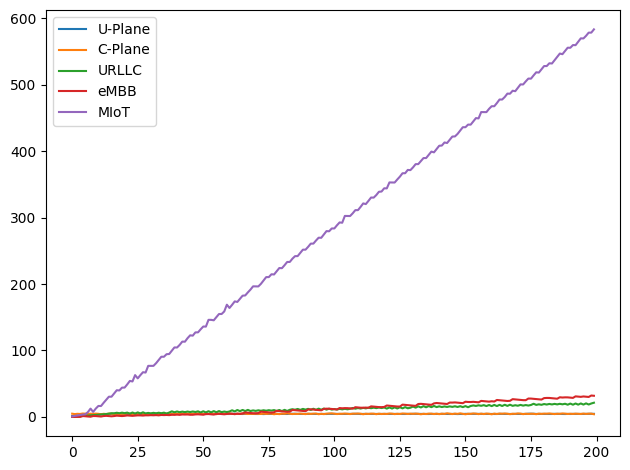

In [265]:
plt.plot(delay_us[0][0:200], label="U-Plane")
plt.plot(delay_us[1][0:200], label="C-Plane")
plt.plot(delay_us[2][0:200], label="URLLC")
plt.plot(delay_us[3][0:200], label="eMBB")
plt.plot(delay_us[4][0:200], label="MIoT")
plt.legend()

flow
0    33.333333
1    33.333333
2    33.333333
dtype: float64


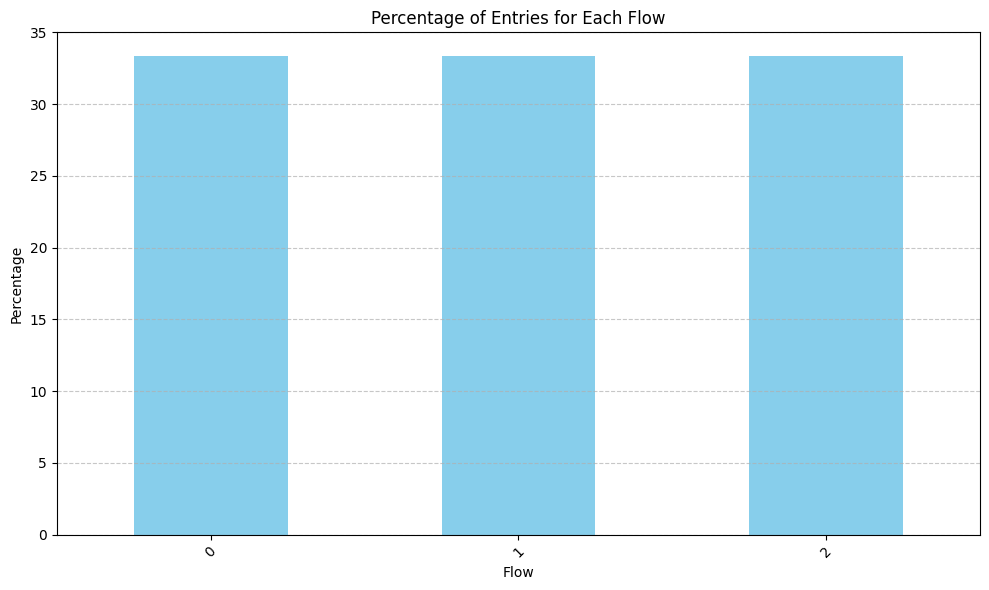

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
folder = "./sim_results/"
Sched_dec = pd.read_csv(f"{folder}sched-wfq-decision.log", sep='\s+', header=None, names=["flow", "pktsize"])
# Count the number of entries with flow equal to a specific number
flow_count = Sched_dec.groupby('flow').size()
# print(flow_count)

# Calculate the percentage of entries for each flow
percentage = (flow_count / flow_count.sum()) * 100
print(percentage)
# Plotting
plt.figure(figsize=(10, 6))
percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Entries for Each Flow')
plt.xlabel('Flow')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
